## Create ML model using RANDOM FOREST algorithm for self-driving car with LIDAR data

In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from micromlgen import port

In [102]:
# read data from csv
data = pd.read_csv('../data/run2/out.txt', header=None)
data.shape

(1178, 361)

In [103]:
data.rename(columns={data.columns[-1]: 'Label'}, inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,Label
0,0.00,615.50,591.50,0.00,569.25,549.75,0.00,532.00,516.00,0.00,...,800.50,0.00,784.25,0.00,753.00,710.50,0.00,675.75,643.00,0.00
1,0.00,680.25,0.00,648.75,619.25,0.00,595.25,572.25,0.00,552.25,...,932.00,0.00,906.00,805.00,791.00,0.00,775.00,759.50,716.50,-0.20
2,0.00,879.75,0.00,857.75,836.75,0.00,818.50,802.00,783.25,0.00,...,1163.75,1134.25,0.00,1015.50,0.00,0.00,956.00,927.00,904.25,0.20
3,1016.75,0.00,1002.50,975.50,0.00,944.25,915.50,0.00,890.00,866.25,...,1109.75,1082.50,1109.50,0.00,0.00,0.00,0.00,1051.25,1037.25,0.38
4,0.00,898.25,0.00,870.00,842.50,0.00,819.25,796.50,0.00,776.50,...,0.00,940.50,1009.00,990.25,0.00,974.75,958.25,945.75,929.75,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,751.75,0.00,768.75,785.50,0.00,803.75,0.00,0.00,986.75,984.75,...,0.00,676.00,687.00,0.00,698.00,709.25,725.00,0.00,736.25,-0.40
1174,848.00,875.00,904.25,937.50,0.00,967.50,0.00,923.00,0.00,924.75,...,728.50,745.50,761.25,0.00,781.25,801.25,0.00,822.75,0.00,-0.20
1175,735.50,757.00,781.50,806.50,0.00,835.25,0.00,744.25,769.00,0.00,...,0.00,652.50,666.50,0.00,681.50,698.25,0.00,717.00,0.00,0.00
1176,584.75,596.00,610.00,0.00,624.00,568.50,0.00,580.75,592.75,0.00,...,530.00,537.25,545.00,0.00,553.00,0.00,564.00,572.00,0.00,0.50


In [104]:
# data = data[~((data['Label'] == 0.0) & (data.index < 100))]

In [105]:
X = data.iloc[:, :-1]
X

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,0.00,615.50,591.50,0.00,569.25,549.75,0.00,532.00,516.00,0.00,...,816.25,800.50,0.00,784.25,0.00,753.00,710.50,0.00,675.75,643.00
1,0.00,680.25,0.00,648.75,619.25,0.00,595.25,572.25,0.00,552.25,...,956.75,932.00,0.00,906.00,805.00,791.00,0.00,775.00,759.50,716.50
2,0.00,879.75,0.00,857.75,836.75,0.00,818.50,802.00,783.25,0.00,...,0.00,1163.75,1134.25,0.00,1015.50,0.00,0.00,956.00,927.00,904.25
3,1016.75,0.00,1002.50,975.50,0.00,944.25,915.50,0.00,890.00,866.25,...,0.00,1109.75,1082.50,1109.50,0.00,0.00,0.00,0.00,1051.25,1037.25
4,0.00,898.25,0.00,870.00,842.50,0.00,819.25,796.50,0.00,776.50,...,955.25,0.00,940.50,1009.00,990.25,0.00,974.75,958.25,945.75,929.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,751.75,0.00,768.75,785.50,0.00,803.75,0.00,0.00,986.75,984.75,...,0.00,0.00,676.00,687.00,0.00,698.00,709.25,725.00,0.00,736.25
1174,848.00,875.00,904.25,937.50,0.00,967.50,0.00,923.00,0.00,924.75,...,0.00,728.50,745.50,761.25,0.00,781.25,801.25,0.00,822.75,0.00
1175,735.50,757.00,781.50,806.50,0.00,835.25,0.00,744.25,769.00,0.00,...,639.00,0.00,652.50,666.50,0.00,681.50,698.25,0.00,717.00,0.00
1176,584.75,596.00,610.00,0.00,624.00,568.50,0.00,580.75,592.75,0.00,...,0.00,530.00,537.25,545.00,0.00,553.00,0.00,564.00,572.00,0.00


In [106]:
# Assign target y as the last column 'Label'
y = data.iloc[:, -1]
y

0       0.00
1      -0.20
2       0.20
3       0.38
4       0.20
        ... 
1173   -0.40
1174   -0.20
1175    0.00
1176    0.50
1177    0.80
Name: Label, Length: 1178, dtype: float64

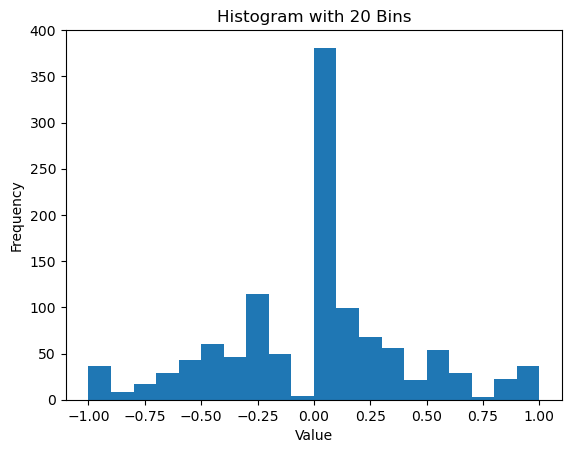

In [107]:
import matplotlib.pyplot as plt
plt.hist(y, bins=20)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram with 20 Bins")
plt.show()

## Begin training

In [108]:
# Split the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [109]:
y_train

1171   -0.14
18     -0.35
169     0.00
104    -0.70
560    -0.40
        ... 
626     0.60
1016    0.67
165    -0.20
7      -0.25
219    -0.50
Name: Label, Length: 883, dtype: float64

In [110]:
k = 30
k_best = SelectKBest(score_func=f_classif, k=k)
k_best.fit(X_train, y_train)

selected_feature_indices = k_best.get_support(indices=True)
print("selected_feature_indices: ", selected_feature_indices)

selected_feature_indices:  [ 24  29  31  35  38  39  40  41  42  43  44  45  47  50  54  55  57 302
 304 312 314 315 316 318 319 321 324 326 328 330]


In [111]:
# Create a random forest regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)

In [112]:
# Train the model on the training data
rf.fit(X_train.iloc[:, selected_feature_indices], y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [113]:
X_test.iloc[:, selected_feature_indices].shape

(295, 30)

In [114]:
# Make predictions on the testing data
y_pred = rf.predict(X_test.iloc[:, selected_feature_indices])

In [115]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.04973659391525423


In [116]:
# Calculate the R-squared value of the predictions
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.7046064530945035


In [117]:
import pickle
# Save the model to disk
filename = 'self_driving_model_0.2.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf, file)